# Online Retails Purchase

## Assignment 2 for 22-04-2022

1. Dataset: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv
2. Questions: https://github.com/a-forty-two/COG_GN22CDBDS001_MARCH_22/blob/main/OnlineRetail.ipynb
3. Solutions: https://github.com/a-forty-two/COG_GN22CDBDS001_MARCH_22/blob/main/OnlineRetail_with_solutions_code.ipynb

# Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Step 2: Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv)

# Step 3: Assign it to a variable called online_rt

In [2]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding='latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# Step 4: Create a histogram with the 10 countries that have the most "Quantity" ordered except UK

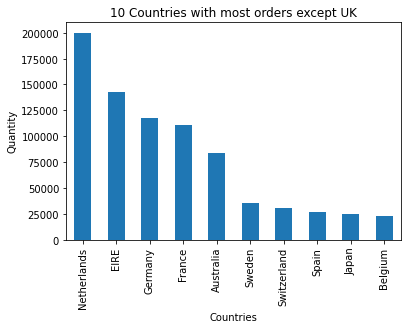

In [3]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by='Quantity', ascending=False)[1:11]
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders except UK')
plt.show()

# Step 5: Exclude negative Quantity entries

In [4]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# Step 6: Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

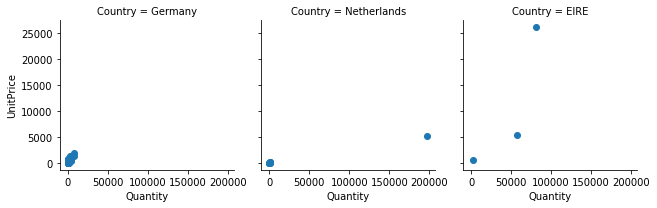

In [5]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]
g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1)
g.add_legend()

# Step 7: Investigate why the previous results look so uninformative

## Step 7.1: Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem

# Step 8: Plot a line chart showing revenue (y) per UnitPrice (x)

In [9]:
price_start = 0
price_end = 50
price_interval = 1

buckets = np.arange(price_start, price_end, price_interval)
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

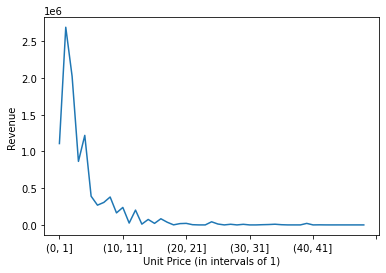

In [10]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()